In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Part One

### Load Dataset

In [2]:
FILE_NAME = 'GooglePlay.csv'
# Assuming the dataset is in a CSV file named 'dataset.csv'
df = pd.read_csv(FILE_NAME)

### Clean Dataset

In [3]:
# Remove non-numeric characters from the 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows with NaN values in the 'Installs' column
df = df.dropna(subset=['Installs'])

# Remove non-numeric characters from the 'Reviews' column
df['Reviews'] = pd.to_numeric(df['Reviews'].str.replace(',', ''), errors='coerce')

C:\Users\fathi\AppData\Local\Temp\ipykernel_11040\3241697511.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')


### Store Cleaned Dataset

In [4]:
# Store the cleaned dataset in a new file named 'cleaned_dataset.csv'
df.to_csv('cleaned_dataset.csv', index=False)

# Display a message to indicate the file has been saved
print("The cleaned dataset has been saved to 'cleaned_dataset.csv'.")

The cleaned dataset has been saved to 'cleaned_dataset.csv'.


In [5]:
# Function to calculate characteristics
def calculate_characteristics(df, column_name):
    characteristics = {
        'Outlier': None, # Outlier calculation depends on the context
        'Median': df[column_name].median(),
        'Mode': df[column_name].mode()[0] if df[column_name].mode().size > 0 else None,
        'Mean': df[column_name].mean(),
        'Max': df[column_name].max(),
        'Min': df[column_name].min(),
        'Range': df[column_name].max() - df[column_name].min(),
        'Type': 'Discrete' if df[column_name].dtype == 'int64' else 'Continuous',
        'Feature Name': column_name
    }
    return characteristics

### Calculate characteristics for each numerical column

In [6]:
numerical_columns = ['Rating', 'Reviews' , 'Installs']
for column in numerical_columns:
    characteristics = calculate_characteristics(df, column)
    print(f"Characteristics for {column}:")
    print(characteristics)
    print("\n")

Characteristics for Rating:
{'Outlier': None, 'Median': 4.3, 'Mode': 4.4, 'Mean': 4.191757420456978, 'Max': 5.0, 'Min': 1.0, 'Range': 4.0, 'Type': 'Continuous', 'Feature Name': 'Rating'}


Characteristics for Reviews:
{'Outlier': None, 'Median': 2094.0, 'Mode': 0, 'Mean': 444152.89603321033, 'Max': 78158306, 'Min': 0, 'Range': 78158306, 'Type': 'Discrete', 'Feature Name': 'Reviews'}


Characteristics for Installs:
{'Outlier': None, 'Median': 100000.0, 'Mode': 1000000.0, 'Mean': 15464338.882564576, 'Max': 1000000000.0, 'Min': 0.0, 'Range': 1000000000.0, 'Type': 'Continuous', 'Feature Name': 'Installs'}




### Plot Outer Values for each feature

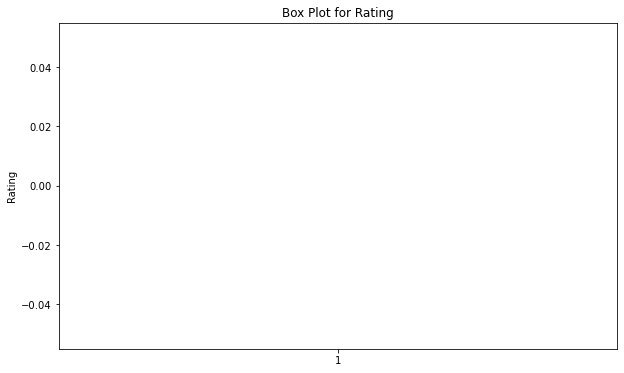

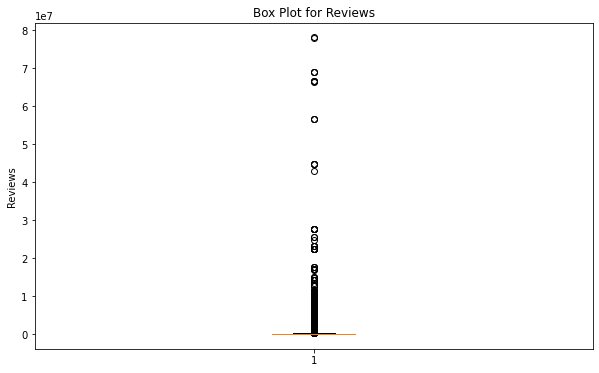

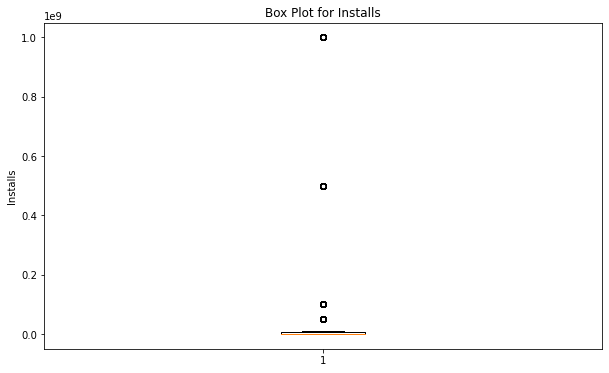

In [10]:
# Function to plot Box Plots for each numerical column
def plot_boxplot(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column_name])
    plt.title(f"Box Plot for {column_name}")
    plt.ylabel(column_name)
    plt.show()

# Plot Box Plots for each numerical column
for column in numerical_columns:
    plot_boxplot(df, column)